<a href="https://colab.research.google.com/github/Drinkler/Yield-Prediction/blob/main/Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General

In [1]:
# https://github.com/hajir-almahdi/Machine-Learning-Capstone-Project
# https://towardsdatascience.com/predicting-crops-yield-machine-learning-nanodegree-capstone-project-e6ec9349f69

In [2]:
# Imports
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Define url to data
resource_folder = 'https://raw.githubusercontent.com/Drinkler/Yield-Prediction/main/res'

pesticides_url = '{}/pesticides.csv?token=AEEE4P7JUYWTGUEXQFQFP6TAN4NLQ'.format(resource_folder)
rainfall_url = '{}/rainfall.csv?token=AEEE4P6QEF6CK5DAD7EOWP3AN4NLU'.format(resource_folder)
temperature_url = '{}/temp.csv?token=AEEE4P5INYQIFOKMOSCRDP3AN4NLW'.format(resource_folder)
yield_url = '{}/yield.csv?token=AEEE4PYVSV3JAZO4CSXFA43AN4NL2'.format(resource_folder)

In [4]:
# Load data
pesticides_data = pd.read_csv(pesticides_url, sep=',')
rainfall_data = pd.read_csv(rainfall_url, sep=', ')
temperature_data = pd.read_csv(temperature_url, sep=', ')
yield_data = pd.read_csv(yield_url, sep=',')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [5]:
yield_data = pd.read_csv('kleine_wahl.csv', sep=',')

#Data Preparation


## Rainfall data

In [6]:
rainfall_data

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,2.03926,2016,Aug Average,Zimbabwe,ZWE
272828,0.48070,2016,Sep Average,Zimbabwe,ZWE
272829,9.13410,2016,Oct Average,Zimbabwe,ZWE
272830,72.95080,2016,Nov Average,Zimbabwe,ZWE


In [7]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rainfall - (MM)  272832 non-null  float64
 1   Year             272832 non-null  int64  
 2   Statistics       272832 non-null  object 
 3   Country          272832 non-null  object 
 4   ISO3             272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [8]:
rainfall_data.describe()

,Rainfall - (MM),Year
count,272832.000000,272832.000000
mean,103.470868,1958.500000
std,113.231867,33.485133
min,0.000000,1901.000000
25%,24.168375,1929.750000
50%,66.431550,1958.500000
75%,149.647250,1987.250000
max,2699.190000,2016.000000


In [9]:
# Number of countries
len(rainfall_data['Country'].unique())

196

In [10]:
# Number of years (1901 - 2016)
len(rainfall_data['Year'].unique())

116

In [11]:
# One year from Afghanistan
rainfall_data.head(12)

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
5,16.64650,1901,Jun Average,Afghanistan,AFG
6,7.38656,1901,Jul Average,Afghanistan,AFG
7,0.59306,1901,Aug Average,Afghanistan,AFG
8,4.82593,1901,Sep Average,Afghanistan,AFG
9,11.49720,1901,Oct Average,Afghanistan,AFG


In [12]:
# Rain data in years for each country
rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).sum()
rainfall_df

,Year,Country,ISO3,Rainfall - (MM)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022
...,...,...,...,...
22731,2016,Venezuela,VEN,1844.70330
22732,2016,Vietnam,VNM,1988.86180
22733,2016,Yemen,YEM,171.48137
22734,2016,Zambia,ZMB,803.47810


## Temperature data

In [13]:
temperature_data

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,18.75550,2016,Aug Average,Zimbabwe,ZWE
272828,22.99190,2016,Sep Average,Zimbabwe,ZWE
272829,25.86640,2016,Oct Average,Zimbabwe,ZWE
272830,25.85150,2016,Nov Average,Zimbabwe,ZWE


In [14]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperature - (Celsius)  272832 non-null  float64
 1   Year                     272832 non-null  int64  
 2   Statistics               272832 non-null  object 
 3   Country                  272832 non-null  object 
 4   ISO3                     272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [15]:
temperature_data.describe()

,Temperature - (Celsius),Year
count,272832.000000,272832.000000
mean,18.631498,1958.500000
std,10.248635,33.485133
min,-34.121000,1901.000000
25%,13.231575,1929.750000
50%,22.736300,1958.500000
75%,25.797700,1987.250000
max,38.566900,2016.000000


In [16]:
# Number of countries
len(temperature_data['Country'].unique())

196

In [17]:
# Number of years (1901 - 2016)
len(temperature_data['Year'].unique())

116

In [18]:
# One year from Afghanistan
temperature_data.head(12)

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
5,22.17270,1901,Jun Average,Afghanistan,AFG
6,25.37870,1901,Jul Average,Afghanistan,AFG
7,23.66520,1901,Aug Average,Afghanistan,AFG
8,19.46550,1901,Sep Average,Afghanistan,AFG
9,11.28370,1901,Oct Average,Afghanistan,AFG


In [19]:
# Average temperature data in years for each country
temperature_df =temperature_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0).mean()
temperature_df

,Year,Country,ISO3,Temperature - (Celsius)
0,1901,Afghanistan,AFG,13.172872
1,1901,Albania,ALB,11.030938
2,1901,Algeria,DZA,22.290008
3,1901,Andorra,AND,9.960649
4,1901,Angola,AGO,21.365725
...,...,...,...,...
22731,2016,Venezuela,VEN,26.478200
22732,2016,Vietnam,VNM,25.073158
22733,2016,Yemen,YEM,24.221200
22734,2016,Zambia,ZMB,22.737050



## Yield data

In [20]:
yield_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Afghanistan,Yield,Barley,1961,hg/ha,10800
1,Crops,Afghanistan,Yield,Barley,1962,hg/ha,10800
2,Crops,Afghanistan,Yield,Barley,1963,hg/ha,10800
3,Crops,Afghanistan,Yield,Barley,1964,hg/ha,10857
4,Crops,Afghanistan,Yield,Barley,1965,hg/ha,10857
...,...,...,...,...,...,...,...
67494,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,20486
67495,Crops,Zimbabwe,Yield,Wheat,2016,hg/ha,19013
67496,Crops,Zimbabwe,Yield,Wheat,2017,hg/ha,17542
67497,Crops,Zimbabwe,Yield,Wheat,2018,hg/ha,16379


In [21]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67499 entries, 0 to 67498
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   67499 non-null  object
 1   Area     67499 non-null  object
 2   Element  67499 non-null  object
 3   Item     67499 non-null  object
 4   Year     67499 non-null  int64 
 5   Unit     67499 non-null  object
 6   Value    67499 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.6+ MB


In [22]:
yield_data.describe()

,Year,Value
count,67499.00000,6.749900e+04
mean,1992.47734,8.877057e+04
std,16.86041,1.113207e+05
min,1961.00000,0.000000e+00
25%,1978.00000,1.864750e+04
50%,1994.00000,5.000000e+04
75%,2007.00000,1.205955e+05
max,2019.00000,3.782051e+06


In [23]:
# Number of countries
len(yield_data['Area'].unique())

203

In [24]:
# Number of years (1961 - 2019)
len(yield_data['Year'].unique())

59

In [25]:
# Remove unnecessary columns
yield_df = yield_data.drop(['Domain', 'Element'], axis=1)
yield_df

,Area,Item,Year,Unit,Value
0,Afghanistan,Barley,1961,hg/ha,10800
1,Afghanistan,Barley,1962,hg/ha,10800
2,Afghanistan,Barley,1963,hg/ha,10800
3,Afghanistan,Barley,1964,hg/ha,10857
4,Afghanistan,Barley,1965,hg/ha,10857
...,...,...,...,...,...
67494,Zimbabwe,Wheat,2015,hg/ha,20486
67495,Zimbabwe,Wheat,2016,hg/ha,19013
67496,Zimbabwe,Wheat,2017,hg/ha,17542
67497,Zimbabwe,Wheat,2018,hg/ha,16379


## Pesticides data

In [26]:
pesticides_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1990,tonnes,121
1,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1991,tonnes,121
2,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1992,tonnes,121
3,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1993,tonnes,121
4,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...,...,...
4784,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2014,tonnes,2185
4785,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2015,tonnes,2185
4786,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2016,tonnes,2185
4787,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2017,tonnes,2185


In [27]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   4789 non-null   object
 1   Area     4789 non-null   object
 2   Element  4789 non-null   object
 3   Item     4789 non-null   object
 4   Year     4789 non-null   int64 
 5   Unit     4789 non-null   object
 6   Value    4789 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 262.0+ KB


In [28]:
pesticides_data.describe()

,Year,Value
count,4789.000000,4.789000e+03
mean,2004.142619,2.894718e+04
std,8.302595,1.627207e+05
min,1990.000000,0.000000e+00
25%,1997.000000,9.900000e+01
50%,2004.000000,1.221000e+03
75%,2011.000000,7.420000e+03
max,2018.000000,1.815690e+06


In [29]:
# Number of countries
len(pesticides_data['Area'].unique())

172

In [30]:
# Number of years (1990 - 2018)
len(pesticides_data['Year'].unique())

29

In [31]:
# Remove unnecessary columns
pesticides_df = pesticides_data.drop(['Domain', 'Element'], axis=1)
pesticides_df

,Area,Item,Year,Unit,Value
0,Albania,Pesticides (total),1990,tonnes,121
1,Albania,Pesticides (total),1991,tonnes,121
2,Albania,Pesticides (total),1992,tonnes,121
3,Albania,Pesticides (total),1993,tonnes,121
4,Albania,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...
4784,Zimbabwe,Pesticides (total),2014,tonnes,2185
4785,Zimbabwe,Pesticides (total),2015,tonnes,2185
4786,Zimbabwe,Pesticides (total),2016,tonnes,2185
4787,Zimbabwe,Pesticides (total),2017,tonnes,2185


## Merging

In [32]:
rainfall_df.rename({'Rainfall - (MM)': 'Rainfall (mm)'}, axis=1, inplace=True)

In [33]:
temperature_df.rename({'Temperature - (Celsius)': 'Temperature (Celsius)'}, axis=1, inplace=True)

In [34]:
yield_df.rename({'Area': 'Country', 'Value': 'Yield (hg/ha)'}, axis=1, inplace=True)
yield_df.drop('Unit', axis=1, inplace=True)

In [35]:
pesticides_df.rename({'Area': 'Country', 'Value': 'Pesticides (tonnes)'}, axis=1, inplace=True)
pesticides_df.drop(['Unit', 'Item'], axis=1, inplace=True)

In [36]:
rain_temp_df = pd.merge(rainfall_df, temperature_df, on=['Country', 'Year', 'ISO3'])
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Country', 'Year'])
rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, pesticides_df, on=['Country', 'Year'])
rain_temp_yield_pest_df.drop('ISO3', axis=1, inplace=True)
data = rain_temp_yield_pest_df[['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celsius)', 'Pesticides (tonnes)', 'Yield (hg/ha)']]
data

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
0,1990,Albania,Barley,812.23450,12.051221,121,10000
1,1990,Albania,Carrots and turnips,812.23450,12.051221,121,150000
2,1990,Albania,Cauliflowers and broccoli,812.23450,12.051221,121,171429
3,1990,Albania,Garlic,812.23450,12.051221,121,65000
4,1990,Albania,Maize,812.23450,12.051221,121,36613
...,...,...,...,...,...,...,...
26948,2016,Zimbabwe,Oats,455.13295,22.310167,2185,20505
26949,2016,Zimbabwe,Pears,455.13295,22.310167,2185,15472
26950,2016,Zimbabwe,Potatoes,455.13295,22.310167,2185,51792
26951,2016,Zimbabwe,Sweet potatoes,455.13295,22.310167,2185,27283


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26953 entries, 0 to 26952
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   26953 non-null  int64  
 1   Country                26953 non-null  object 
 2   Item                   26953 non-null  object 
 3   Rainfall (mm)          26953 non-null  float64
 4   Temperature (Celsius)  26953 non-null  float64
 5   Pesticides (tonnes)    26953 non-null  int64  
 6   Yield (hg/ha)          26953 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.6+ MB


In [38]:
data.describe()

,Year,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
count,26953.000000,26953.000000,26953.000000,2.695300e+04,2.695300e+04
mean,2003.381034,961.614097,16.535127,3.528968e+04,9.751679e+04
std,7.679360,711.599339,7.966410,1.753216e+05,1.083373e+05
min,1990.000000,16.703610,-7.166322,0.000000e+00,0.000000e+00
25%,1997.000000,485.371400,9.932312,6.140000e+02,2.172700e+04
50%,2003.000000,749.402800,17.934908,2.867000e+03,5.830600e+04
75%,2010.000000,1333.910100,23.772358,1.409300e+04,1.374190e+05
max,2016.000000,4999.686400,29.541075,1.815690e+06,1.784262e+06


In [39]:
# Number of countries
len(data.Country.unique())

135

In [40]:
# Number of years (1990 - 2016)
len(data.Year.unique())

27

# Data Exploration

## Rainfall data

In [41]:
rainfall_df

,Year,Country,ISO3,Rainfall (mm)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022
...,...,...,...,...
22731,2016,Venezuela,VEN,1844.70330
22732,2016,Vietnam,VNM,1988.86180
22733,2016,Yemen,YEM,171.48137
22734,2016,Zambia,ZMB,803.47810


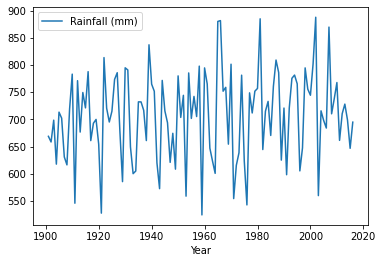

In [42]:
rainfall_df.loc[rainfall_df['Country'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

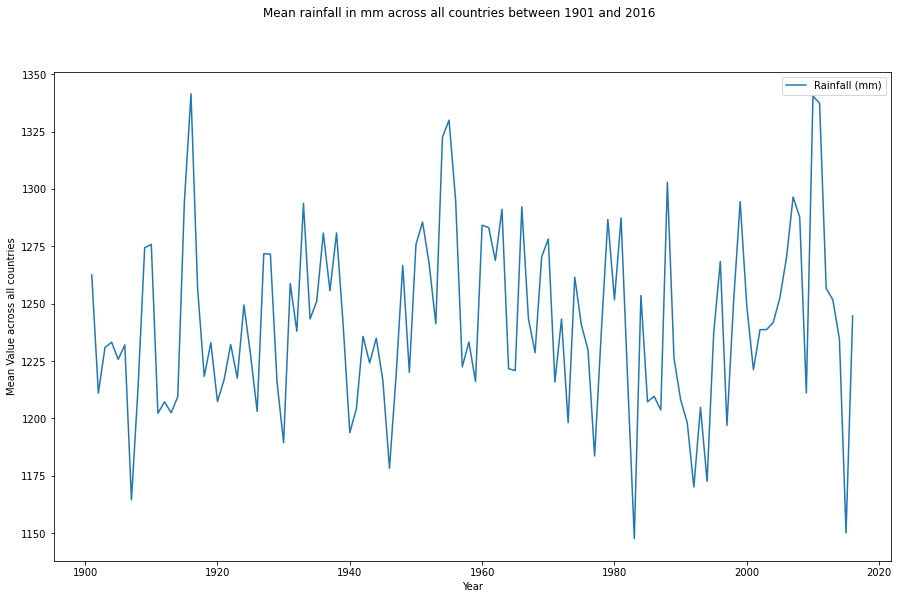

In [43]:
# prepare data
temp_data = rainfall_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean rainfall in mm across all countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Temperature data

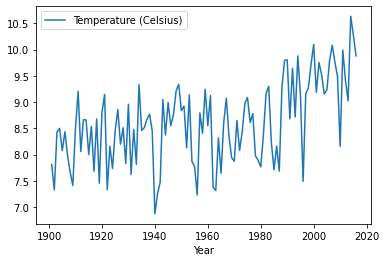

In [44]:
temperature_df.loc[temperature_df['Country'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

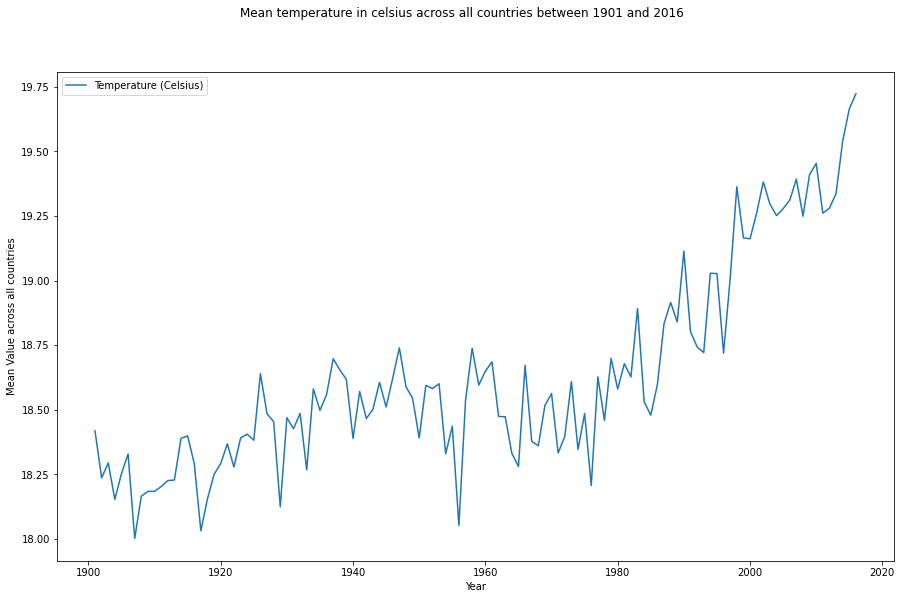

In [45]:
# prepare data
temp_data = temperature_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean temperature in celsius across all countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Yield data

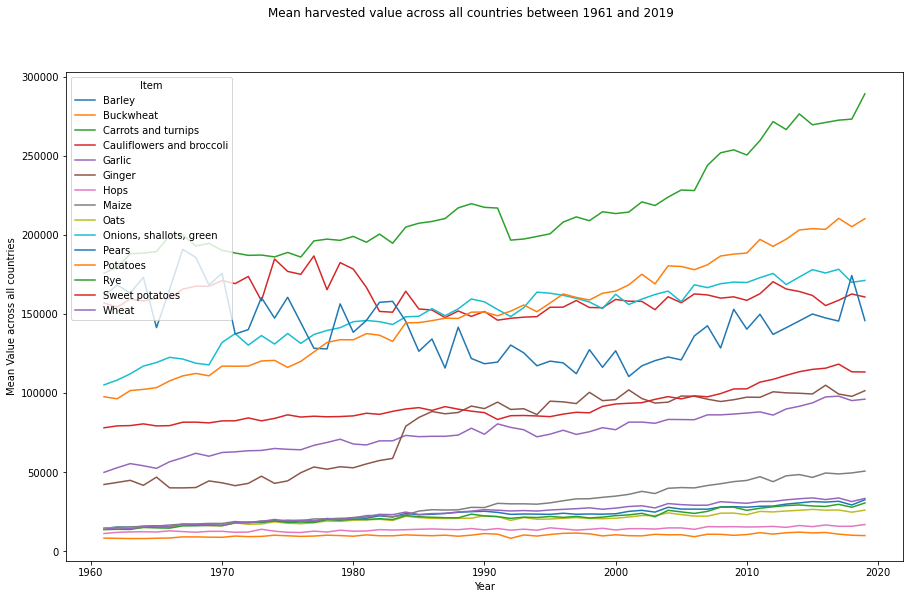

In [48]:
# prepare data
yield_mean = yield_data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

yield_mean['Value'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

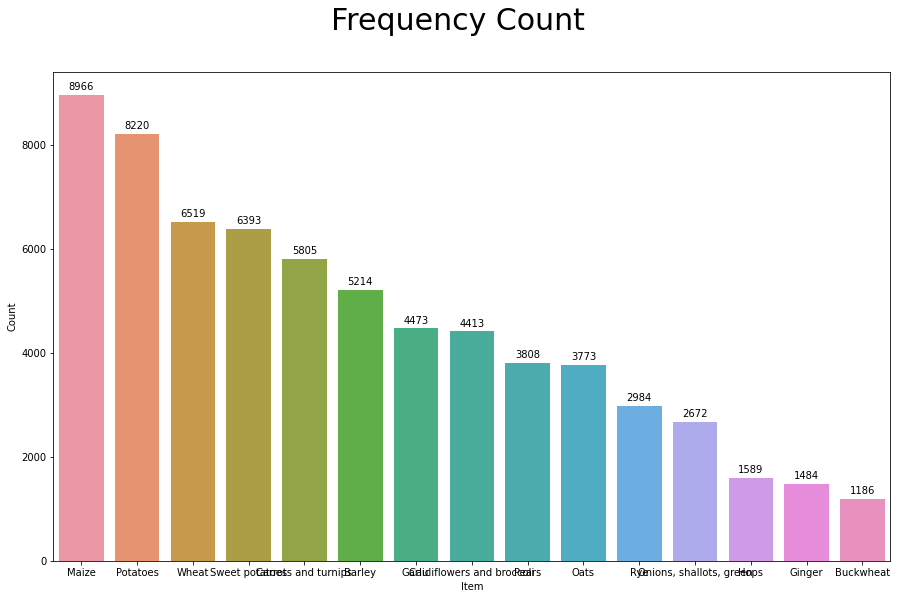

In [49]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = yield_data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 100, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

## Pesticide data

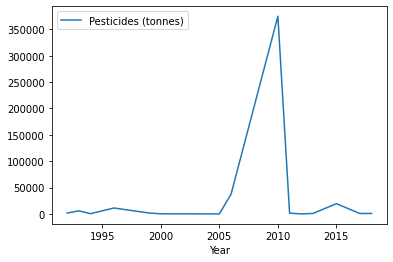

In [50]:
pesticides_df.loc[temperature_df['Country'] == 'Germany'].groupby('Year').mean().plot()
plt.show()

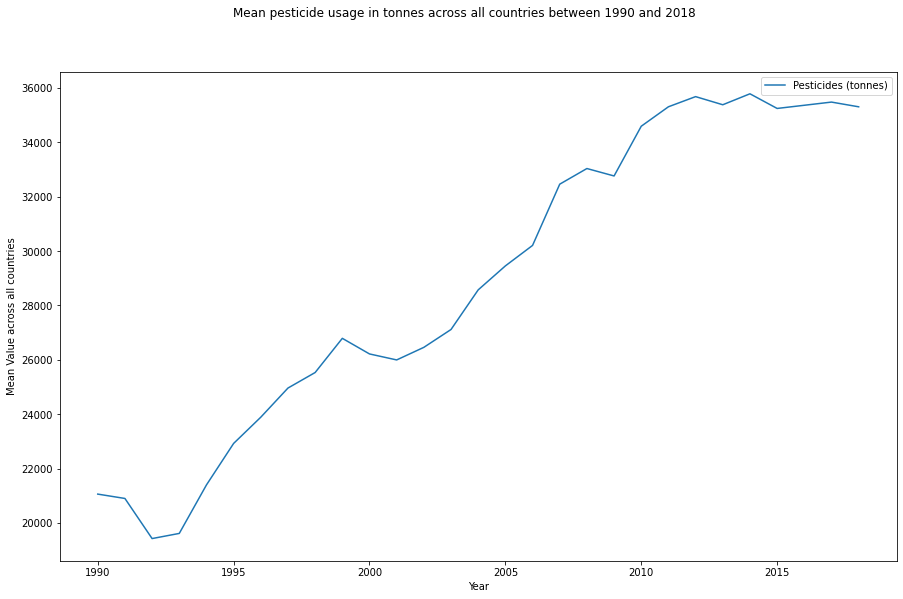

In [51]:
# prepare data
temp_data = pesticides_df.groupby('Year').mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean pesticide usage in tonnes across all countries between 1990 and 2018')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

## Merged data

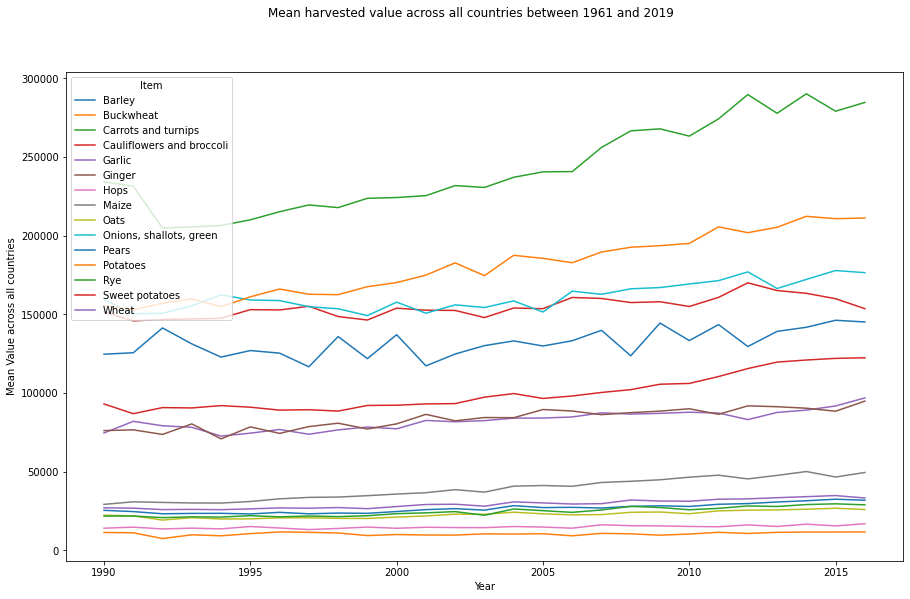

In [52]:
# prepare data
temp_data = data.groupby(['Year', 'Item']).mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean harvested value across all countries between 1961 and 2019')

temp_data['Yield (hg/ha)'].unstack().plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

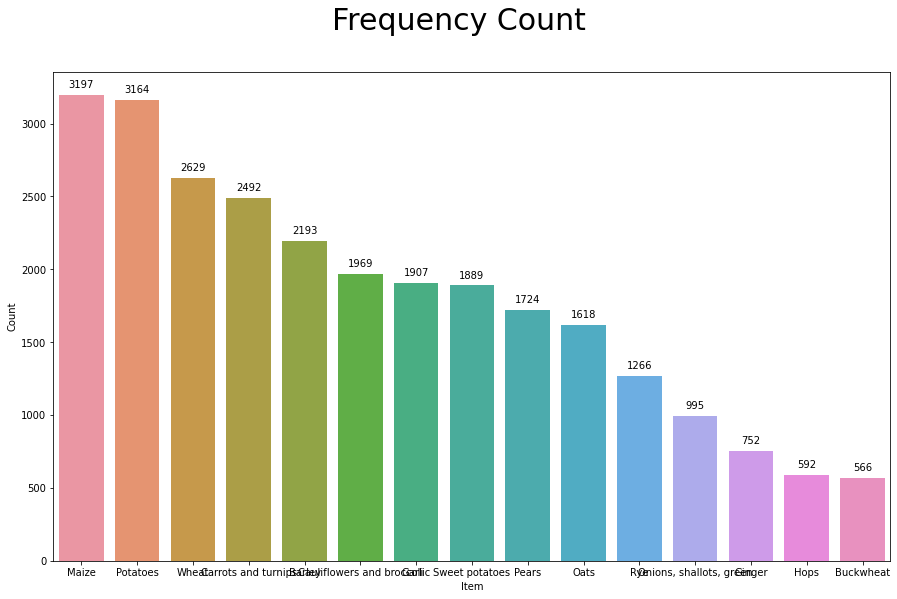

In [53]:
fig, axs = plt.subplots(1,1, figsize=(15,9))
fig.suptitle('Frequency Count', size=30)

temp_df = data['Item'].value_counts().to_frame().reset_index()
g = sns.barplot(x='index', y='Item', data=temp_df, orient='v', ax=axs)

for index, row in temp_df.iterrows():
    g.text(row.name,row.Item + 50, row.Item, color='black', ha="center")

axs.set_xlabel('Item')
axs.set_ylabel('Count')

fig.show()

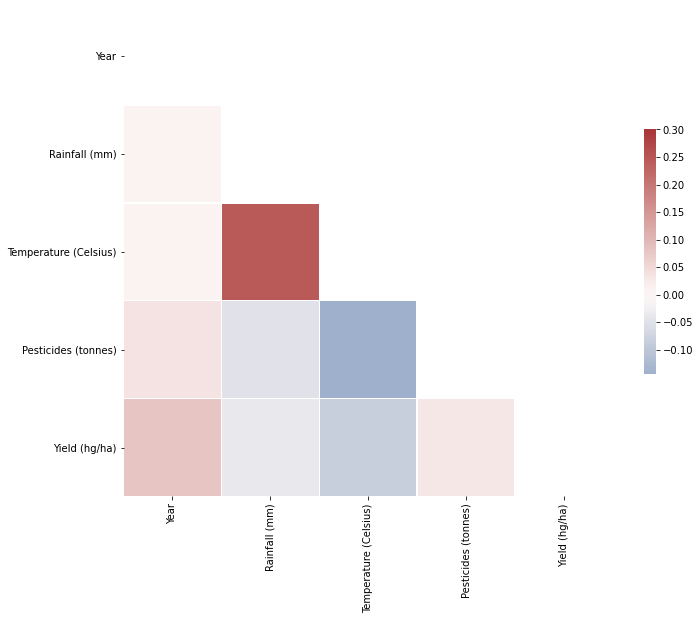

In [54]:
corr = data.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.palette="vlag"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## brauchen wir das noch

In [55]:
data.groupby('Item').count()

,Year,Country,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
Item,,,,,,
Barley,2193,2193,2193,2193,2193,2193
Buckwheat,566,566,566,566,566,566
Carrots and turnips,2492,2492,2492,2492,2492,2492
Cauliflowers and broccoli,1969,1969,1969,1969,1969,1969
Garlic,1907,1907,1907,1907,1907,1907
Ginger,752,752,752,752,752,752
Hops,592,592,592,592,592,592
Maize,3197,3197,3197,3197,3197,3197
Oats,1618,1618,1618,1618,1618,1618


In [56]:
data.groupby(['Country'],sort=True)['Yield (hg/ha)'].sum().nlargest(25)

Country
Switzerland          66102318
New Zealand          63964902
Netherlands          54523368
Israel               49522243
Germany              49321979
Japan                49204974
Spain                48238189
France               48128579
China                46743712
Egypt                42976321
Kuwait               42921606
Italy                42860522
Republic of Korea    41675570
Greece               40868465
Australia            40681518
Jordan               39662137
Turkey               37709188
Chile                36994963
Denmark              36467315
Austria              35987896
Mexico               35407854
Sweden               34278073
Portugal             33995637
Norway               33595720
Morocco              33595316
Name: Yield (hg/ha), dtype: int64

In [57]:
data.groupby(['Item','Country'],sort=True)['Yield (hg/ha)'].sum().nlargest(25)

Item                       Country    
Pears                      Switzerland    23147550
Carrots and turnips        Israel         17397068
                           Netherlands    14701291
                           Iceland        14375045
                           Sweden         13809516
                           Spain          13466568
                           Germany        12908732
                           Austria        12889845
                           Denmark        12357698
Potatoes                   New Zealand    11962908
Carrots and turnips        Australia      11885409
                           Kuwait         11824376
                           Italy          11766449
Potatoes                   Netherlands    11683260
Cauliflowers and broccoli  Kuwait         11478472
Onions, shallots, green    New Zealand    11370330
Carrots and turnips        Ireland        11341675
Pears                      New Zealand    11334496
Potatoes                   France         1

# Data Preprocessing

## One Hot Encoding

In [58]:
data.shape

(26953, 7)

In [59]:
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(data, columns=['Country', 'Item'], prefix=['Country', 'Item'])
data = df_onehot.loc[:, df_onehot.columns != 'Yield (hg/ha)']
data['Yield (hg/ha)'] = df_onehot['Yield (hg/ha)']

In [60]:
data.shape

(26953, 155)

## Backward Elimination

In [61]:
data.shape

(26953, 155)

In [62]:
import statsmodels.api as sm

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break

data = data[cols]
data.insert(len(data.columns), 'Yield (hg/ha)', y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [63]:
data.shape

(26953, 133)

## Removing of Outliers

In [64]:
data.shape

(26953, 133)

In [65]:
from scipy import stats

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

z_scores = stats.zscore(X)
abs_z_scores = np.abs(z_scores)

filtered_entries = (abs_z_scores < 15).all(axis=1)
X = X[filtered_entries]

X.insert(len(X.columns), 'Yield (hg/ha)', y)
data = X

In [66]:
data.shape

(24653, 133)

## Feature Scaling

In [67]:
data.shape

(24653, 133)

In [68]:
from sklearn.preprocessing import MinMaxScaler

y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

scaler = MinMaxScaler()
data_without_yield = pd.DataFrame(scaler.fit_transform(X), index=y.index)
data_without_yield.columns = X.columns
data_without_yield.insert(len(data_without_yield.columns), 'Yield (hg/ha)', y)

data = data_without_yield

In [69]:
data.shape

(24653, 133)

# Modeling

In [70]:
y = data['Yield (hg/ha)']
X = data.drop('Yield (hg/ha)', axis=1)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [73]:
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):

  # linear least-squares
  slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

  ax.scatter(y_test, y_pred, alpha=0.7)

  # Anzeigen der Werte in einer Box
  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Actual values in tonnes')
  ax.set_ylabel('Predictes values in tonnes')
  ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid 

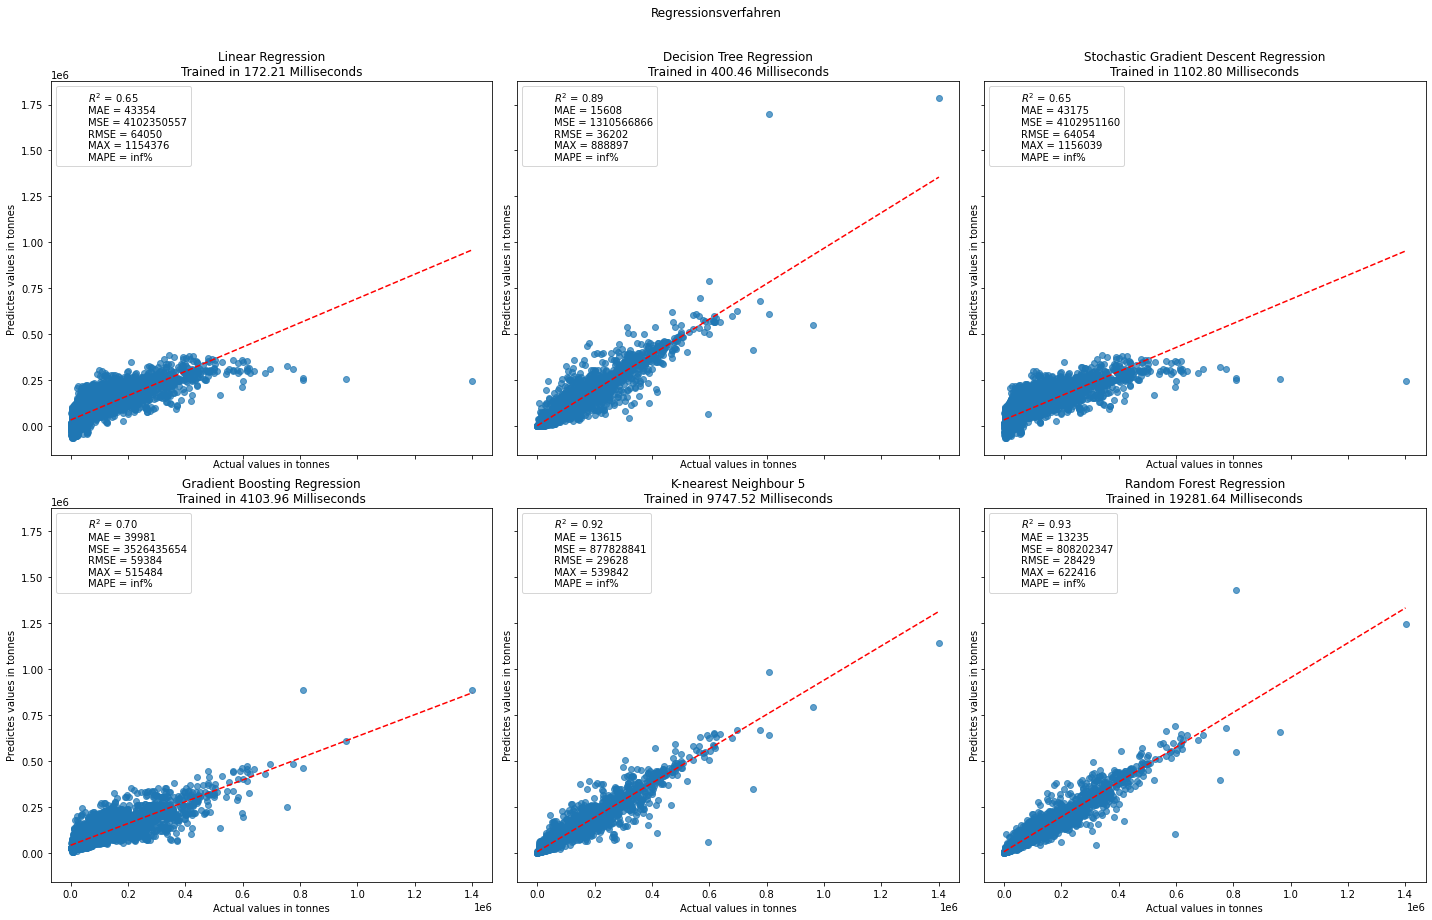

In [74]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

import time
from scipy.stats import linregress

lin = LinearRegression()
dtr = DecisionTreeRegressor()
sgd = SGDRegressor(loss='squared_loss')
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()

# Verwendete Regressionen
estimators = [('Linear Regression', lin),
              ('Decision Tree Regression', dtr),
              ('Stochastic Gradient Descent Regression', sgd),
              ('Gradient Boosting Regression', gbr),
              ('K-nearest Neighbour 5', knn),
              ('Random Forest Regression', rfr)]

# Festlegen des Subplots
fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
  start_time = time.time()
  # Trainieren des Modelles
  est.fit(X_train, y_train)
  y_pred = est.predict(X_test)
  estimated_time = time.time() - start_time

  # Anzeigen des Modelles
  plot_regression_results(ax, y_test, y_pred, name, estimated_time, 
                          (r'$R^2$ = {:.2f}' + '\n' + 
                          r'MAE = {:.0f}' + '\n' +
                          r'MSE = {:.0f}' + '\n' +
                          r'RMSE = {:.0f}' + '\n' +
                          r'MAX = {:.0f}' + '\n' +
                          r'MAPE = {:.2f}%')
                          .format(r2_score(y_test, y_pred),
                                  mean_absolute_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred),
                                  mean_squared_error(y_test, y_pred, squared=False),
                                  max_error(y_test, y_pred),
                                  mean_absolute_percentage_error(y_test, y_pred)))
  
plt.suptitle('Regressionsverfahren')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

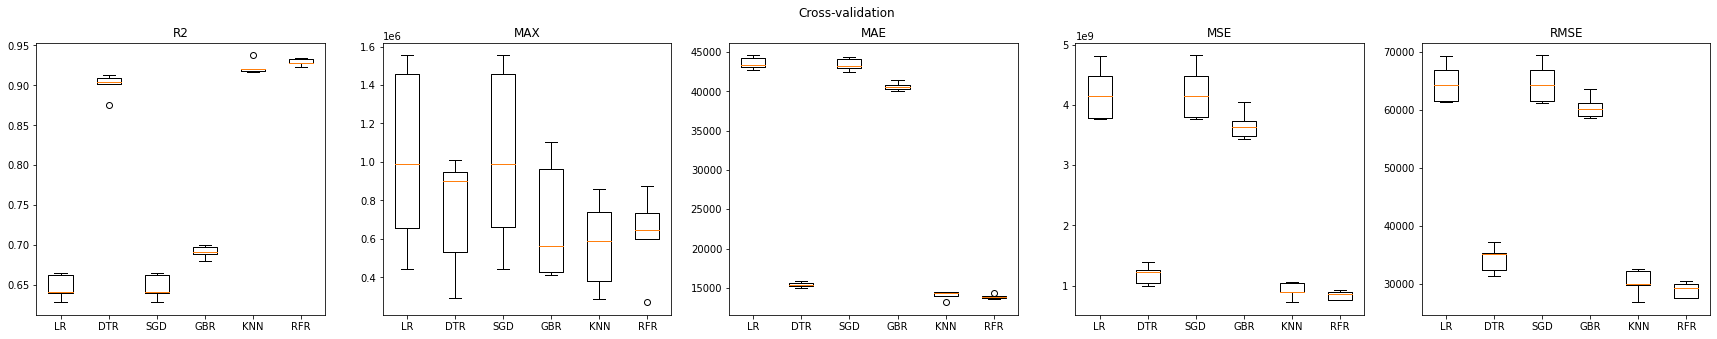

In [75]:
r2_values = []
max_error_values = []
neg_mean_absolute_error_values = []
neg_mean_squared_error_values = []
neg_root_mean_squared_error_values = []

for name, est in estimators:
  # Kreuzvalidierung
  score = cross_validate(est, X_train, y_train, cv=5,
                         scoring=['r2', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                         n_jobs=-1)

  # Abspeichern der Werte
  r2_values.append(score['test_r2'])
  max_error_values.append(-score['test_max_error'])
  neg_mean_absolute_error_values.append(-score['test_neg_mean_absolute_error'])
  neg_mean_squared_error_values.append(-score['test_neg_mean_squared_error'])
  neg_root_mean_squared_error_values.append(-score['test_neg_root_mean_squared_error'])

# Plotten der Werte
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

names = ['LR', 'DTR', 'SGD', 'GBR', 'KNN', 'RFR']

axs[0].boxplot(r2_values, labels=names)
axs[0].set_title('R2')
axs[1].boxplot(max_error_values, labels=names)
axs[1].set_title('MAX')
axs[2].boxplot(neg_mean_absolute_error_values, labels=names)
axs[2].set_title('MAE')
axs[3].boxplot(neg_mean_squared_error_values, labels=names)
axs[3].set_title('MSE')
axs[4].boxplot(neg_root_mean_squared_error_values, labels=names)
axs[4].set_title('RMSE')

plt.suptitle('Cross-validation')
plt.show()

In [76]:
regression = 5

print(u'R²: {:.3f} \u00B1 {:.3f}'.format(np.mean(r2_values[regression]), np.std(r2_values[regression])))
print(u'MAX: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(max_error_values[regression]), np.std(max_error_values[regression])))
print(u'MAE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_absolute_error_values[regression]), np.std(neg_mean_absolute_error_values[regression])))
print(u'MSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_mean_squared_error_values[regression]), np.std(neg_mean_squared_error_values[regression])))
print(u'RMSE: {:,.0f} \u00B1 {:,.0f}'.format(np.mean(neg_root_mean_squared_error_values[regression]), np.std(neg_root_mean_squared_error_values[regression])))

R²: 0.929 ± 0.004
MAX: 625,120 ± 201,412
MAE: 13,905 ± 260
MSE: 842,316,200 ± 70,033,768
RMSE: 28,997 ± 1,212


https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [77]:
#from sklearn.tree import export_graphviz
#import pydot

#tree = rfr.estimators_[5]

#export_graphviz(tree, out_file = 'tree.dot', feature_names = data.columns[:-1], rounded = True, precision = 1)
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
#graph.write_png('tree.png')